In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

usecols = ['caffeine', 'age', 'cups', 'favorite', 'why_drink', 'taste', 'gender', 'education_level', 'employment_status']
df = pd.read_csv('coffee_survey.csv', usecols=usecols)
order = [
   '<18 years old',
   '25-34 years old',
   '35-44 years old',
   '18-24 years old',
   '45-54 years old',
   '55-64 years old'
]
df['age'] = pd.Categorical(df['age'], categories=order)

print(f'Rows before `dropna()`: {df.shape[0]}')
df.dropna(inplace=True)
print(f'Rows after `dropna()`: {df.shape[0]}')
df.head()

Rows before `dropna()`: 4042
Rows after `dropna()`: 3313


,age,cups,favorite,caffeine,why_drink,taste,gender,education_level,employment_status
34,45-54 years old,2,Regular drip coffee,Full caffeine,It tastes good,Yes,Male,Master's degree,Employed full-time
41,25-34 years old,2,Pourover,Full caffeine,"It tastes good, I need the caffeine",Yes,Male,Master's degree,Unemployed
42,35-44 years old,1,Iced coffee,Full caffeine,It tastes good,Yes,Male,Bachelor's degree,Employed full-time
43,45-54 years old,More than 4,Pourover,Full caffeine,"It tastes good, I need the caffeine, I need th...",Yes,Male,Bachelor's degree,Employed full-time
46,35-44 years old,2,Cappuccino,Full caffeine,"I need the ritual, It tastes good",Yes,Male,Less than high school,Unemployed


In [42]:
df['age'].value_counts()

age
25-34 years old    1739
35-44 years old     808
18-24 years old     365
45-54 years old     243
55-64 years old     146
<18 years old        12
Name: count, dtype: int64

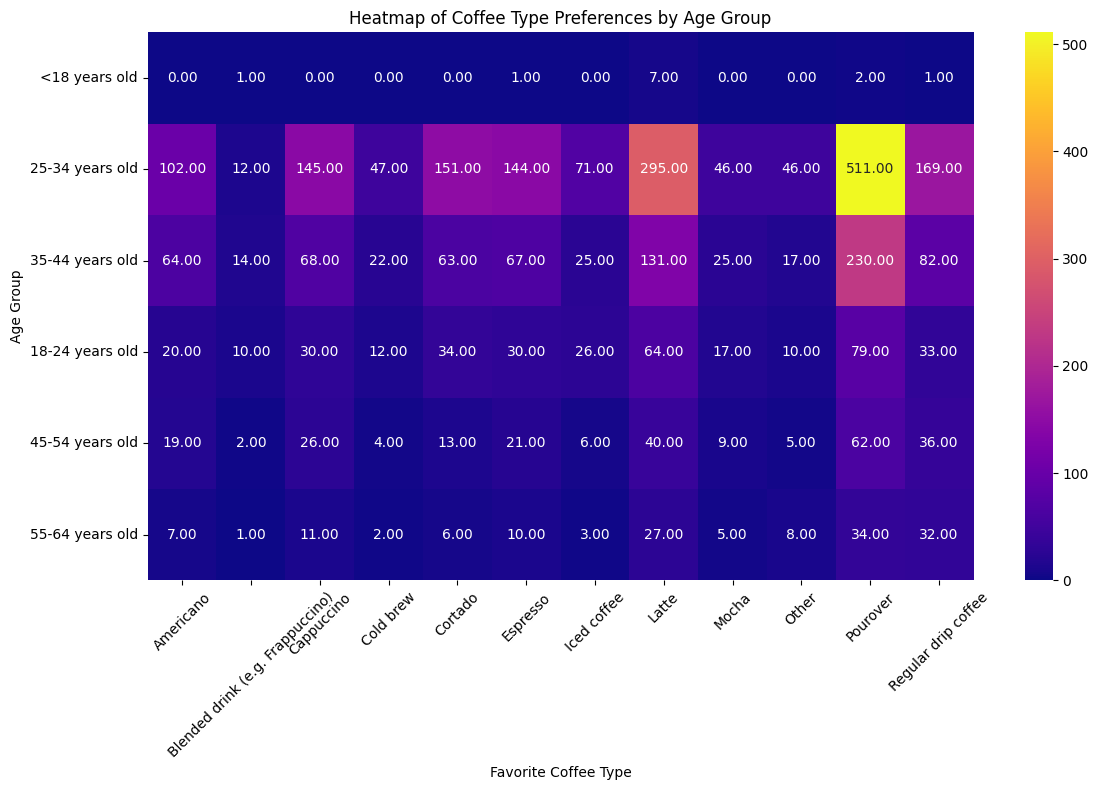

In [43]:
# Creating a pivot table for the Heatmap of Coffee Type Preferences by Age Group
df_pivot = pd.crosstab(df['age'], df['favorite'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='plasma', fmt=".2f")
plt.title('Heatmap of Coffee Type Preferences by Age Group')
plt.xlabel('Favorite Coffee Type')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
